In [1]:
import pynbody as pnb
import numpy as np
import pylab

In [4]:
sh17 = pnb.load('snapshot_017')
hdfsh17 = pnb.load('snapshot_017.hdf5')

In [3]:
sh17.properties

{'omegaM0': 0.308,
 'omegaL0': 0.692,
 'boxsize': Unit("5.00e+01 Mpc a h**-1"),
 'a': 0.9999999999999996,
 'h': 0.678,
 'time': Unit("9.57e-03 s Mpc a**1/2 h**-1 km**-1")}

In [9]:
hdfsh17.properties

{'a': 0.9999999999999996,
 'omegaB0': 0.0482,
 'omegaM0': 0.308,
 'omegaL0': 0.692,
 'boxsize': Unit("1.54e+26 cm a h**-1"),
 'h': 0.678,
 'time': Unit("1.38e+01 Gyr"),
 'Git_commit': b'e3e352d8680d06bba1953164a45892f75d396d68',
 'Git_date': b'Sat Feb 13 15:17:54 2021 +0100',
 'MassTable': array([0.       , 0.0636744]),
 'NumFilesPerSnapshot': 1,
 'NumPart_ThisFile': array([       0, 16777216], dtype=uint64),
 'NumPart_Total': array([       0, 16777216], dtype=uint64),
 'Redshift': 4.440892098500626e-16}

SimArray([[0.14521466, 0.14767447, 0.1501343 , ..., 0.3932259 ,
           0.30350724, 0.21378858],
          [0.13491508, 0.13061586, 0.12631662, ..., 0.3994416 ,
           0.30857593, 0.21771026],
          [0.12461551, 0.11355724, 0.10249898, ..., 0.40565723,
           0.3136446 , 0.22163197],
          ...,
          [0.2834862 , 0.27327478, 0.2630633 , ..., 0.44338703,
           0.3809664 , 0.31854576],
          [0.24059077, 0.23511118, 0.22963163, ..., 0.4261467 ,
           0.3544162 , 0.2826857 ],
          [0.19769529, 0.1969476 , 0.19619992, ..., 0.4089063 ,
           0.32786596, 0.24682562]], dtype=float32, '1.00e+10 h**2 Msol Mpc**-3 a**-3')

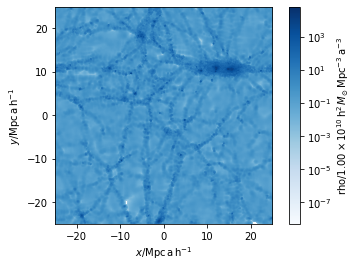

In [6]:
bxsz = sh17.properties['boxsize'] 
pnb.plot.image(sh17,width=bxsz, cmap='Blues') 

SimArray([[0.14521466, 0.14767447, 0.1501343 , ..., 0.3932259 ,
           0.30350724, 0.21378858],
          [0.13491508, 0.13061586, 0.12631662, ..., 0.3994416 ,
           0.30857593, 0.21771026],
          [0.12461551, 0.11355724, 0.10249898, ..., 0.40565723,
           0.3136446 , 0.22163197],
          ...,
          [0.2834862 , 0.27327478, 0.2630633 , ..., 0.44338703,
           0.3809664 , 0.31854576],
          [0.24059077, 0.23511118, 0.22963163, ..., 0.4261467 ,
           0.3544162 , 0.2826857 ],
          [0.19769529, 0.1969476 , 0.19619992, ..., 0.4089063 ,
           0.32786596, 0.24682562]], dtype=float32, '6.77e-31 h**2 g a**-3 cm**-3')

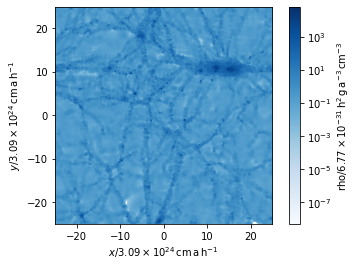

In [8]:
hdfsh17.physical_units
hdfbxsz = hdfsh17.properties['boxsize'] 
pnb.plot.image(hdfsh17,width=bxsz, cmap='Blues') 

In [ ]:
# CONVERTIR ENTRE FORMATOS DE SNAPSHOTS
# GADGET4 HDF5 -> GADGET 2
sh17.write(filename= "snapshot_017", fmt= pynbody.gadget.GadgetSnap)

In [ ]:
#LOAD SNAPSHOT
sh17 = pnb.load('snapshot_017.hdf5')
#WRITE INTO GADGET-4
sh17.write(filename= "snapshot_017", fmt= pynbody.gadget.GadgetSnap)

In [1]:
import glob as gl
import pynbody as pnb
import numpy as np
import subprocess as subp
import time

In [12]:
def TransformG4toG2(data):
    s = pnb.load(data)
    ndat = str.split(data,'.')[0]
    s.write(filename = ndat, fmt = pnb.gadget.GadgetSnap)
    subp.call( [ 'mv', ndat, '/home/martin/Documentos/Tesis/Corridas/CorridasServidor/Run1/gadget2/.' ]  )
       

In [10]:
arch = gl.glob('/home/martin/Documentos/Tesis/Corridas/CorridasServidor/Run1/gadget4/snapshot*', recursive = False)
arch

['/home/martin/Documentos/Tesis/Corridas/CorridasServidor/Run1/gadget4/snapshot_015.hdf5',
 '/home/martin/Documentos/Tesis/Corridas/CorridasServidor/Run1/gadget4/snapshot_011.hdf5',
 '/home/martin/Documentos/Tesis/Corridas/CorridasServidor/Run1/gadget4/snapshot_005.hdf5',
 '/home/martin/Documentos/Tesis/Corridas/CorridasServidor/Run1/gadget4/snapshot_016.hdf5',
 '/home/martin/Documentos/Tesis/Corridas/CorridasServidor/Run1/gadget4/snapshot_010.hdf5',
 '/home/martin/Documentos/Tesis/Corridas/CorridasServidor/Run1/gadget4/snapshot_007.hdf5',
 '/home/martin/Documentos/Tesis/Corridas/CorridasServidor/Run1/gadget4/snapshot_013.hdf5',
 '/home/martin/Documentos/Tesis/Corridas/CorridasServidor/Run1/gadget4/snapshot_000.hdf5',
 '/home/martin/Documentos/Tesis/Corridas/CorridasServidor/Run1/gadget4/snapshot_012.hdf5',
 '/home/martin/Documentos/Tesis/Corridas/CorridasServidor/Run1/gadget4/snapshot_002.hdf5',
 '/home/martin/Documentos/Tesis/Corridas/CorridasServidor/Run1/gadget4/snapshot_003.hdf5',

In [13]:
for i in arch:
    TransformG4toG2(i)
    print(i,time.ctime())

/home/martin/Documentos/Tesis/Corridas/CorridasServidor/Run1/gadget4/snapshot_015.hdf5 Wed May 26 10:46:36 2021
/home/martin/Documentos/Tesis/Corridas/CorridasServidor/Run1/gadget4/snapshot_011.hdf5 Wed May 26 10:47:12 2021
/home/martin/Documentos/Tesis/Corridas/CorridasServidor/Run1/gadget4/snapshot_005.hdf5 Wed May 26 10:47:40 2021
/home/martin/Documentos/Tesis/Corridas/CorridasServidor/Run1/gadget4/snapshot_016.hdf5 Wed May 26 10:48:11 2021
/home/martin/Documentos/Tesis/Corridas/CorridasServidor/Run1/gadget4/snapshot_010.hdf5 Wed May 26 10:48:24 2021
/home/martin/Documentos/Tesis/Corridas/CorridasServidor/Run1/gadget4/snapshot_007.hdf5 Wed May 26 10:48:46 2021
/home/martin/Documentos/Tesis/Corridas/CorridasServidor/Run1/gadget4/snapshot_013.hdf5 Wed May 26 10:49:14 2021
/home/martin/Documentos/Tesis/Corridas/CorridasServidor/Run1/gadget4/snapshot_000.hdf5 Wed May 26 10:49:36 2021
/home/martin/Documentos/Tesis/Corridas/CorridasServidor/Run1/gadget4/snapshot_012.hdf5 Wed May 26 10:49:

In [8]:
pnb.gadget.GadgetSnap?
